<a href="https://colab.research.google.com/github/LAGISHETTYNANDITHA/2203A52097/blob/main/cat_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [13]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [16]:
#generators.
traindf=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)
testdf=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [17]:
#normalise
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

traindf = traindf.map(process)
testdf = testdf.map(process)

In [18]:
# create cnn model
model= Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu', input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(traindf,epochs=10,validation_data=testdf)

Epoch 1/10
625/625 [==============================] - 83s 129ms/step - loss: 0.6366 - accuracy: 0.6370 - val_loss: 0.5349 - val_accuracy: 0.7253
Epoch 2/10
625/625 [==============================] - 75s 120ms/step - loss: 0.4906 - accuracy: 0.7593 - val_loss: 0.3862 - val_accuracy: 0.8270
Epoch 3/10
625/625 [==============================] - 78s 124ms/step - loss: 0.3796 - accuracy: 0.8291 - val_loss: 0.2942 - val_accuracy: 0.8737
Epoch 4/10
625/625 [==============================] - 87s 138ms/step - loss: 0.2651 - accuracy: 0.8864 - val_loss: 0.1959 - val_accuracy: 0.9197
Epoch 5/10
625/625 [==============================] - 74s 118ms/step - loss: 0.1553 - accuracy: 0.9385 - val_loss: 0.1625 - val_accuracy: 0.9396
Epoch 6/10
625/625 [==============================] - 73s 116ms/step - loss: 0.1062 - accuracy: 0.9616 - val_loss: 0.1010 - val_accuracy: 0.9625
Epoch 7/10
625/625 [==============================] - 88s 141ms/step - loss: 0.0690 - accuracy: 0.9784 - val_loss: 0.0868 - val_ac

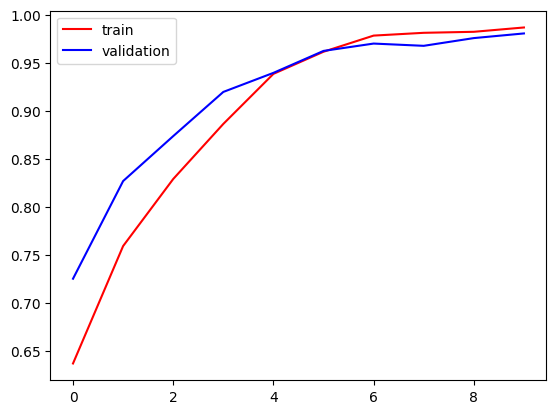

In [26]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'],color='red',label='train')
plt.plot(model.history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

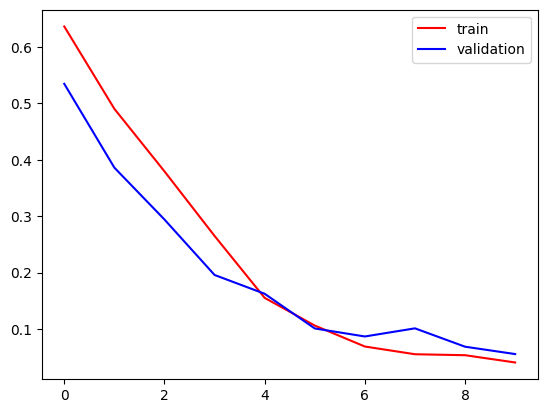

In [29]:
plt.plot(model.history.history['loss'],color='red',label='train')
plt.plot(model.history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [33]:
import matplotlib.pyplot as plt

In [30]:
import cv2

In [31]:
test_img1 = cv2.imread('/content/test/cat.4001.jpg')

TypeError: Image data of dtype object cannot be converted to float

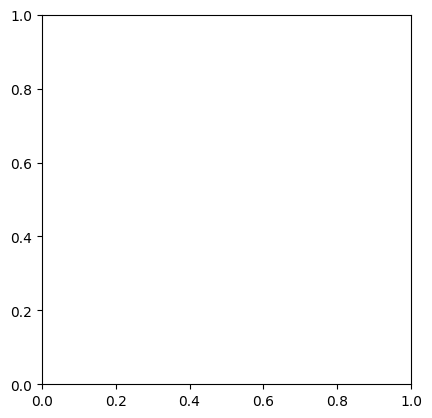

In [34]:
plt.imshow(test_img1)

In [ ]:
test_img1.shape

In [ ]:
test_img1 = cv2.resize(test_img1,(256,256))

In [ ]:
test_input = test_img1.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

**TEST2**

In [35]:
import cv2

In [ ]:
test_img2 = cv2.imread('/content/test/dog.4001.jpg')


**TEST3**

In [38]:
import cv2

In [36]:
test_img3 = cv2.imread('/content/cat.jpg')

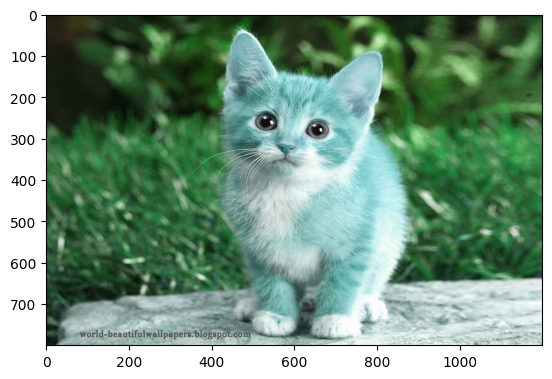

In [37]:
plt.imshow(test_img3)

In [39]:
test_img3.shape

(800, 1200, 3)

In [40]:
test_img3 = cv2.resize(test_img3,(256,256))

In [41]:
test_input = test_img3.reshape((1,256,256,3))

In [42]:
model.predict(test_input)

1/1 [==============================] - 0s 459ms/step


array([[0.]], dtype=float32)

**TEST4**

In [ ]:
import cv2

In [ ]:
test_img4 = cv2.imread('/content/dogs.jpeg')

In [ ]:
test_img5 = cv2.imread('/content/dog.webp')